In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from config_notebooks.config import set_wd
set_wd()

'c:\\Users\\marti\\OneDrive - Económicas - UBA\\Maestría UDESA\\6- Técnicas de producción de conocimiento académico y profesional\\TP4\\Productos Primarios'

In [4]:
df = pd.read_excel("./data/data.xlsx",index_col=0)
df

,pp,pi,gap,er_cp,pre
2005-01-31,508.020737,86.866026,1.154717,827.759645,1423.333333
2005-02-28,500.539941,87.907449,1.160477,805.766198,969.666667
2005-03-31,656.181802,86.226525,1.170061,794.915295,1730.000000
2005-04-30,939.064907,87.964450,1.149008,797.011580,620.000000
2005-05-31,1028.823820,89.117152,1.121609,789.385468,54.666667
...,...,...,...,...,...
2023-05-31,1327.915111,200.236721,2.056724,329.136717,1063.333333
2023-06-30,1273.885921,203.825746,2.034506,334.335871,23.333333
2023-07-31,1419.644081,189.738936,2.008257,336.234909,320.000000
2023-08-31,1464.106039,178.606070,2.136985,360.724410,35.000000


In [5]:
fig = go.Figure()
for variable in df.columns:
    fig.add_trace(go.Line(x = df.index, y =df[variable], name = variable))
fig.update_layout(template = None)

c:\Users\marti\anaconda3\envs\my-proj\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




<Axes: >

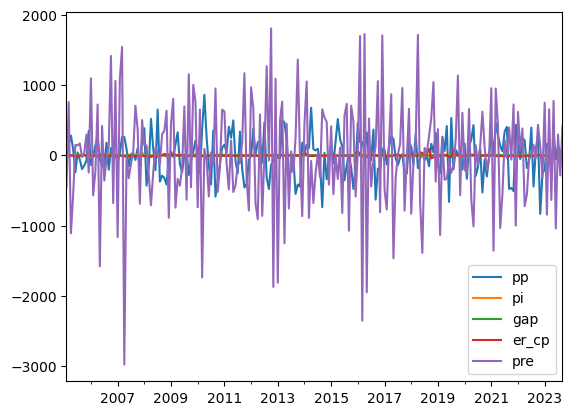

In [6]:
df_diff = df.copy()
df_diff = df_diff.diff().dropna()
df_diff.plot()

<Axes: >

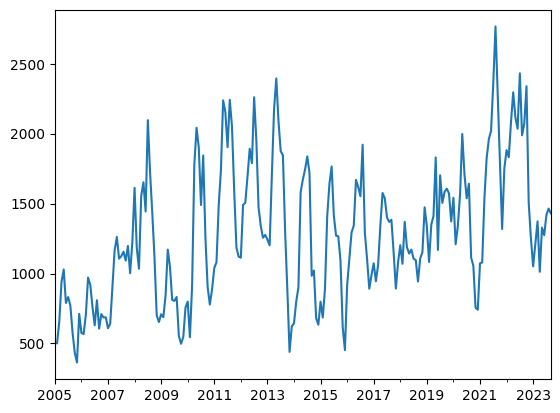

In [7]:
df.pp.plot()

In [8]:
def adfuller_test(df:pd.DataFrame,variable:str):
    print(variable)
    result = adfuller(df[variable], regression = "ctt")
    adf_statistic = result[0]
    p_value = result[1]

    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')

    # Interpret the results
    if p_value <= 0.05:
        print("Reject the null hypothesis: The residual series is stationary.")
    else:
        print("Fail to reject the null hypothesis: The residual series is non-stationary.")
        
for variable in df.columns:  
    adfuller_test(df,variable)
print("-------\n")   
for variable in df_diff.columns:  
    adfuller_test(df_diff,variable)
    

pp
ADF Statistic: -3.67970860095634
p-value: 0.07397297034879932
Fail to reject the null hypothesis: The residual series is non-stationary.
pi
ADF Statistic: -2.119552850377387
p-value: 0.7672660960415176
Fail to reject the null hypothesis: The residual series is non-stationary.
gap
ADF Statistic: -2.2173834067386373
p-value: 0.7215228808433104
Fail to reject the null hypothesis: The residual series is non-stationary.
er_cp
ADF Statistic: -1.8596005568389147
p-value: 0.8652374770358104
Fail to reject the null hypothesis: The residual series is non-stationary.
pre
ADF Statistic: -4.163319321144653
p-value: 0.019438021672027767
Reject the null hypothesis: The residual series is stationary.
-------

pp
ADF Statistic: -5.410134279362018
p-value: 0.000188032626745619
Reject the null hypothesis: The residual series is stationary.
pi
ADF Statistic: -8.150154108865614
p-value: 1.4398113362010078e-10
Reject the null hypothesis: The residual series is stationary.
gap
ADF Statistic: -11.416690577

In [9]:
# def subplot_descomposicion(decomposition: statsmodels.tsa.seasonal.DecomposeResult):
            
#     analisis_estructural = make_subplots(rows=4, cols=1)

#     analisis_estructural.add_trace(
#         go.Scatter(x = decomposition.observed.index, y = decomposition.observed, name = "Original"), row = 1, col=1
#     )

#     analisis_estructural.add_trace(
#         go.Scatter(x = decomposition.trend.index, y = decomposition.trend, name = "Tendencia"), row = 2, col=1
#     )

#     analisis_estructural.add_trace(
#         go.Scatter(x = decomposition.seasonal.index, y = decomposition.seasonal, mode = "lines", name = "Estacionalidad"), row=3, col=1
#     )

#     analisis_estructural.add_trace(
#                 go.Scatter(x = decomposition.resid.index, y = decomposition.resid, mode = "markers", name="Residuos"), row=4, col=1
#                 )

#     analisis_estructural.update_layout(template=None,separators=",.",font_family="georgia",
#                                        title_text = f"Prueba de los componentes: Tendencia, estacionalidad y residuos<br><sup>En millones de US$", height=600)
#     analisis_estructural.update_yaxes(tickformat = ",")
#     return analisis_estructural

# subplot_descomposicion(decomposition).write_html("../output/tendencia-estacionalidad.html")
# subplot_descomposicion(decomposition).write_image("../output/tendencia-estacionalidad.pdf")